In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
from google.colab import files  # Import the files module
uploaded = files.upload()  # Upload the CSV file manually


Saving air quality data.csv to air quality data (1).csv


In [6]:
df  = pd.read_csv("air quality data.csv")
df.head() # Top 5 rows

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
#shape - rows and cols
df.shape


(24850, 16)

In [ ]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   Date        24850 non-null  object 
 2   PM2.5       24172 non-null  float64
 3   PM10        17764 non-null  float64
 4   NO          24463 non-null  float64
 5   NO2         24459 non-null  float64
 6   NOx         22993 non-null  float64
 7   NH3         18314 non-null  float64
 8   CO          24405 non-null  float64
 9   SO2         24245 non-null  float64
 10  O3          24043 non-null  float64
 11  Benzene     21315 non-null  float64
 12  Toluene     19024 non-null  float64
 13  Xylene      9478 non-null   float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


In [ ]:
# to know the duplicate values
df.duplicated().sum()

0

In [ ]:
# to check misiing values
df.isnull().sum()

,0
City,0
Date,0
PM2.5,678
PM10,7086
NO,387
NO2,391
NOx,1857
NH3,6536
CO,445
SO2,605


In [ ]:
# drop the rows 'AQI' has missing values
df.dropna(subset= ['AQI'], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [ ]:
df.shape

(24850, 16)

In [ ]:
# summary of statistics in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [ ]:
# percentage of the null values
null_values_percentage = (df.isnull().sum()/ df.isnull().count() * 100).sort_values(ascending=False)
null_values_percentage

,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


Xylene has the highgest percentage of missing values -61.86%
PM 10and NH3 28 -26%

Week 2 - Visualization


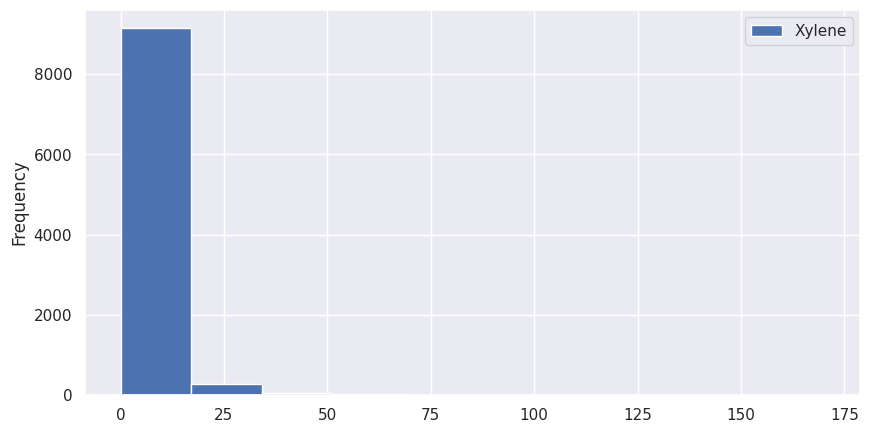

In [ ]:
# Univariate analysis
df ['Xylene'].plot(kind='hist',figsize=(10,5)) # Changed kind-'hist' to kind='hist'
plt.legend()
plt.show()

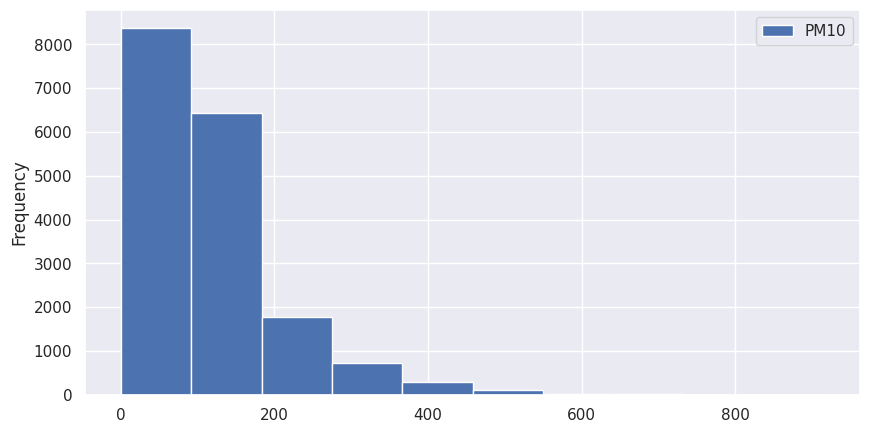

In [ ]:
# Univariate analysis
df ['PM10'].plot(kind='hist',figsize=(10,5)) # Changed kind-'hist' to kind='hist'
plt.legend()
plt.show()

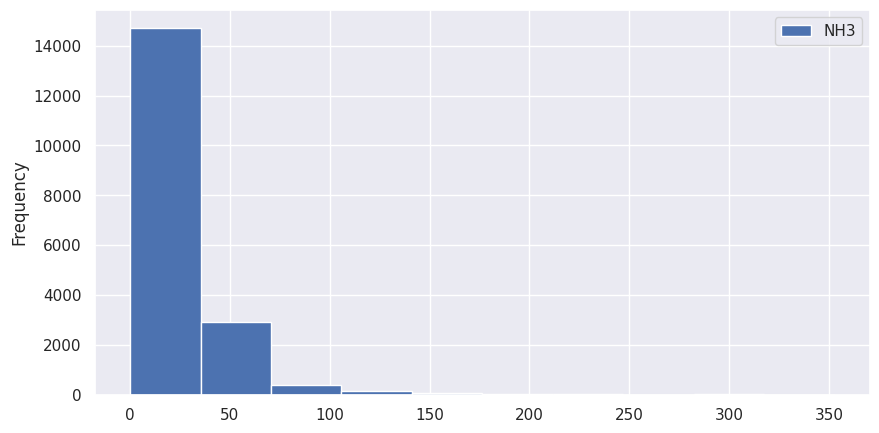

In [ ]:
# Univariate analysis
df ['NH3'].plot(kind='hist',figsize=(10,5)) # Changed kind-'hist' to kind='hist'
plt.legend()
plt.show()

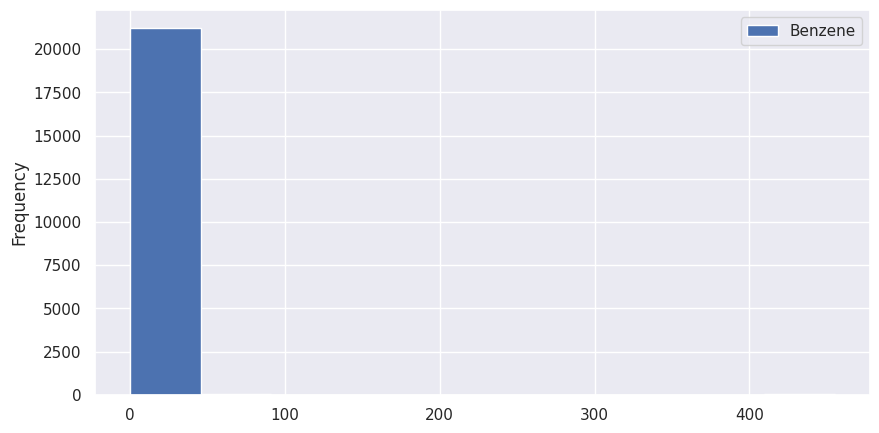

In [ ]:
# Univariate analysis
df ['Benzene'].plot(kind='hist',figsize=(10,5)) # Changed kind-'hist' to kind='hist'
plt.legend()
plt.show()

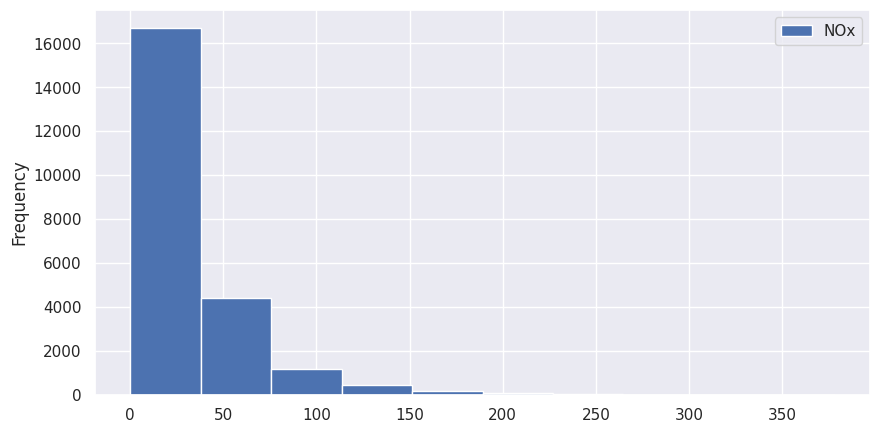

In [ ]:
# Univariate analysis
df ['NOx'].plot(kind='hist',figsize=(10,5)) # Changed kind-'hist' to kind='hist'
plt.legend()
plt.show()

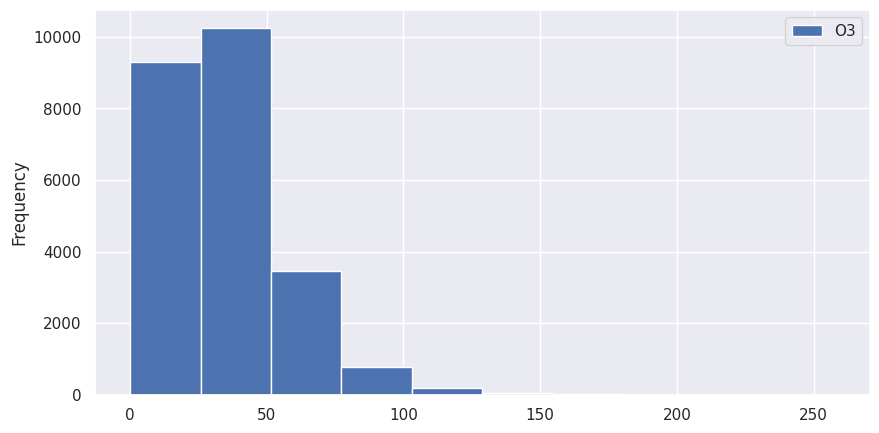

In [ ]:
# Univariate analysis
df ['O3'].plot(kind='hist',figsize=(10,5)) # Changed kind-'hist' to kind='hist'
plt.legend()
plt.show()

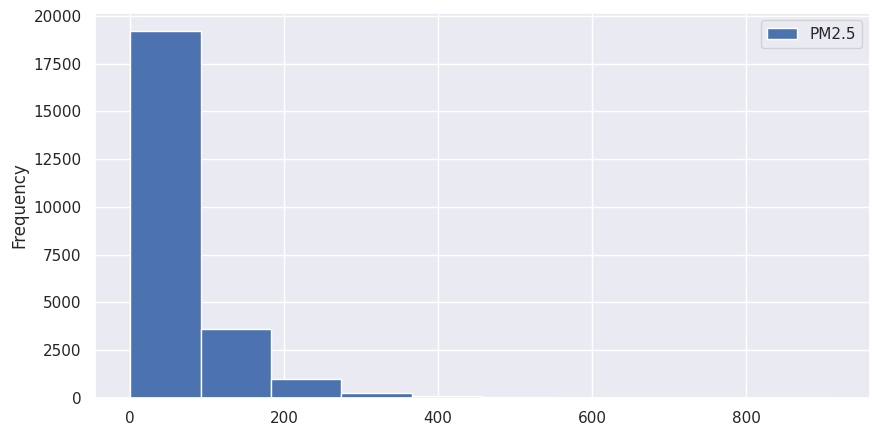

In [ ]:
# Univariate analysis
df ['PM2.5'].plot(kind='hist',figsize=(10,5)) # Changed kind-'hist' to kind='hist'
plt.legend()
plt.show()

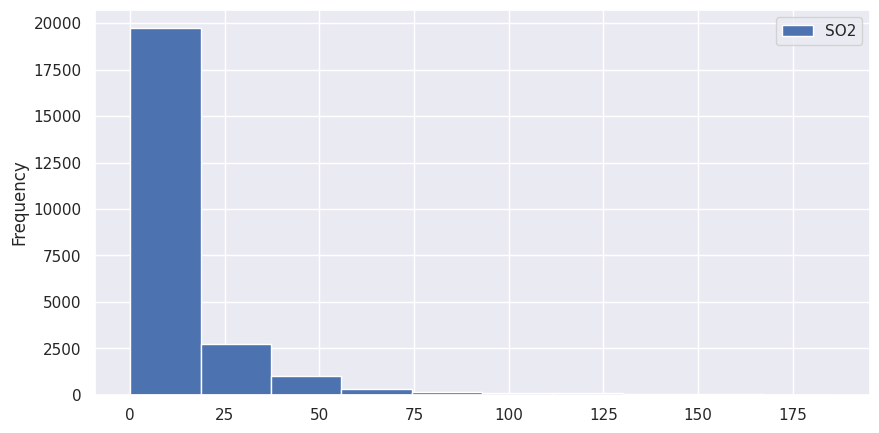

In [ ]:
# Univariate analysis
df ['SO2'].plot(kind='hist',figsize=(10,5)) # Changed kind-'hist' to kind='hist'
plt.legend()
plt.show()

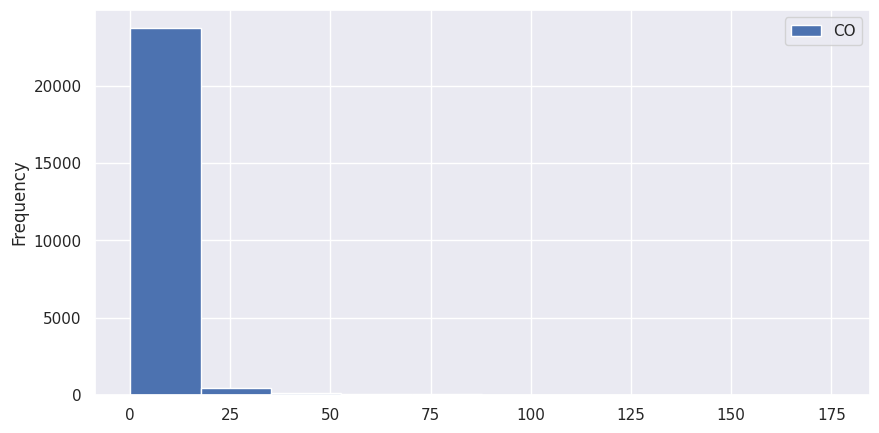

In [ ]:
# Univariate analysis
df ['CO'].plot(kind='hist',figsize=(10,5)) # Changed kind-'hist' to kind='hist'
plt.legend()
plt.show()

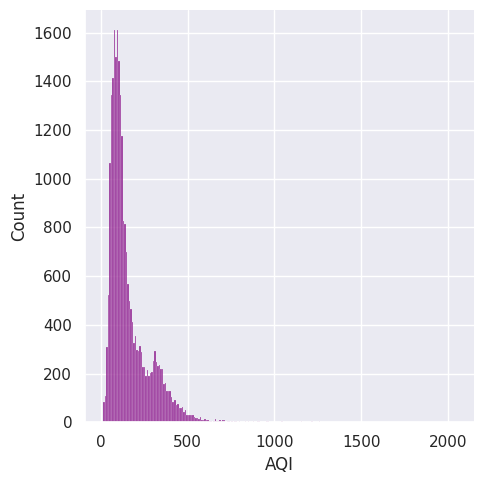

In [ ]:
# Distribution of AQI from 2015 to 2020
sns.displot(df,x='AQI',color='purple')
plt.show()

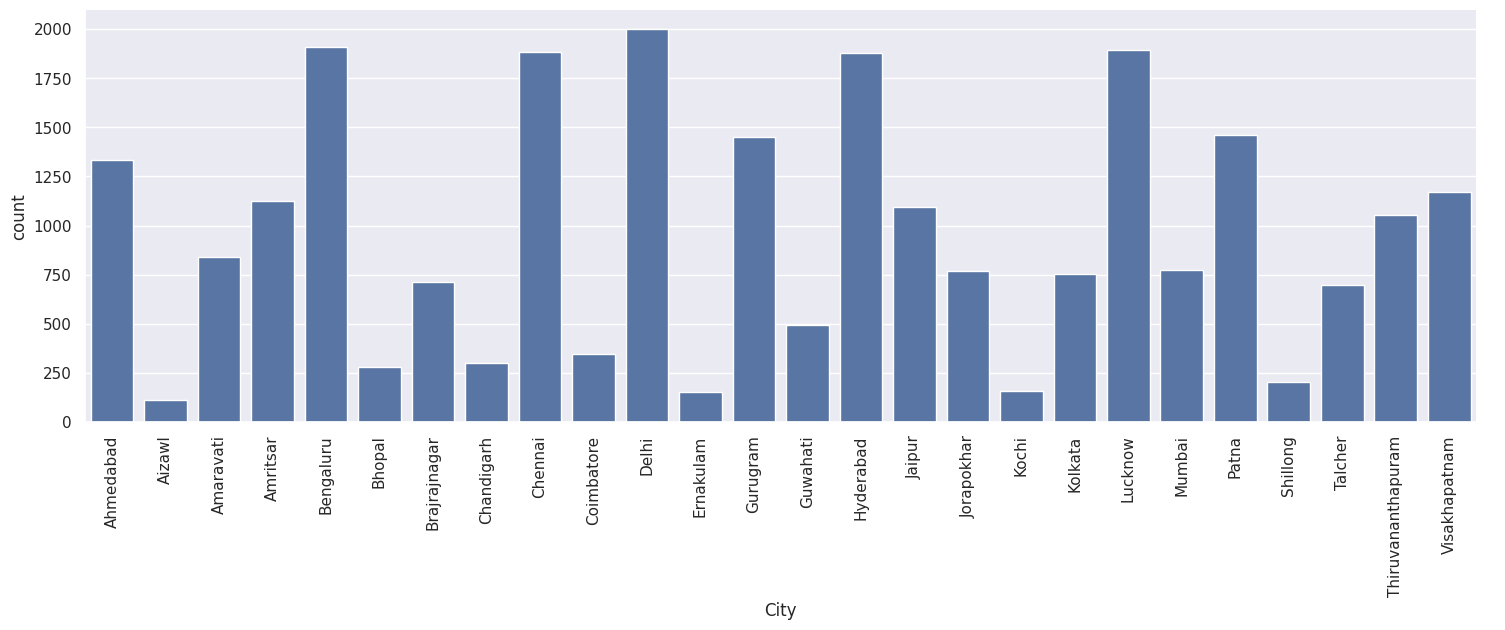

In [ ]:
# Bivariate
sns.set_theme(style='darkgrid')
# Check if 'city' column exists, if not, replace with correct column name
if 'city' not in df.columns:
    # Assuming the column name is 'City' instead of 'city'
    graph = sns.catplot(x="City", kind='count', data=df, height=5, aspect=3)
else:
    graph = sns.catplot(x="city", kind='count', data=df, height=5, aspect=3)

graph.set_xticklabels(rotation=90)



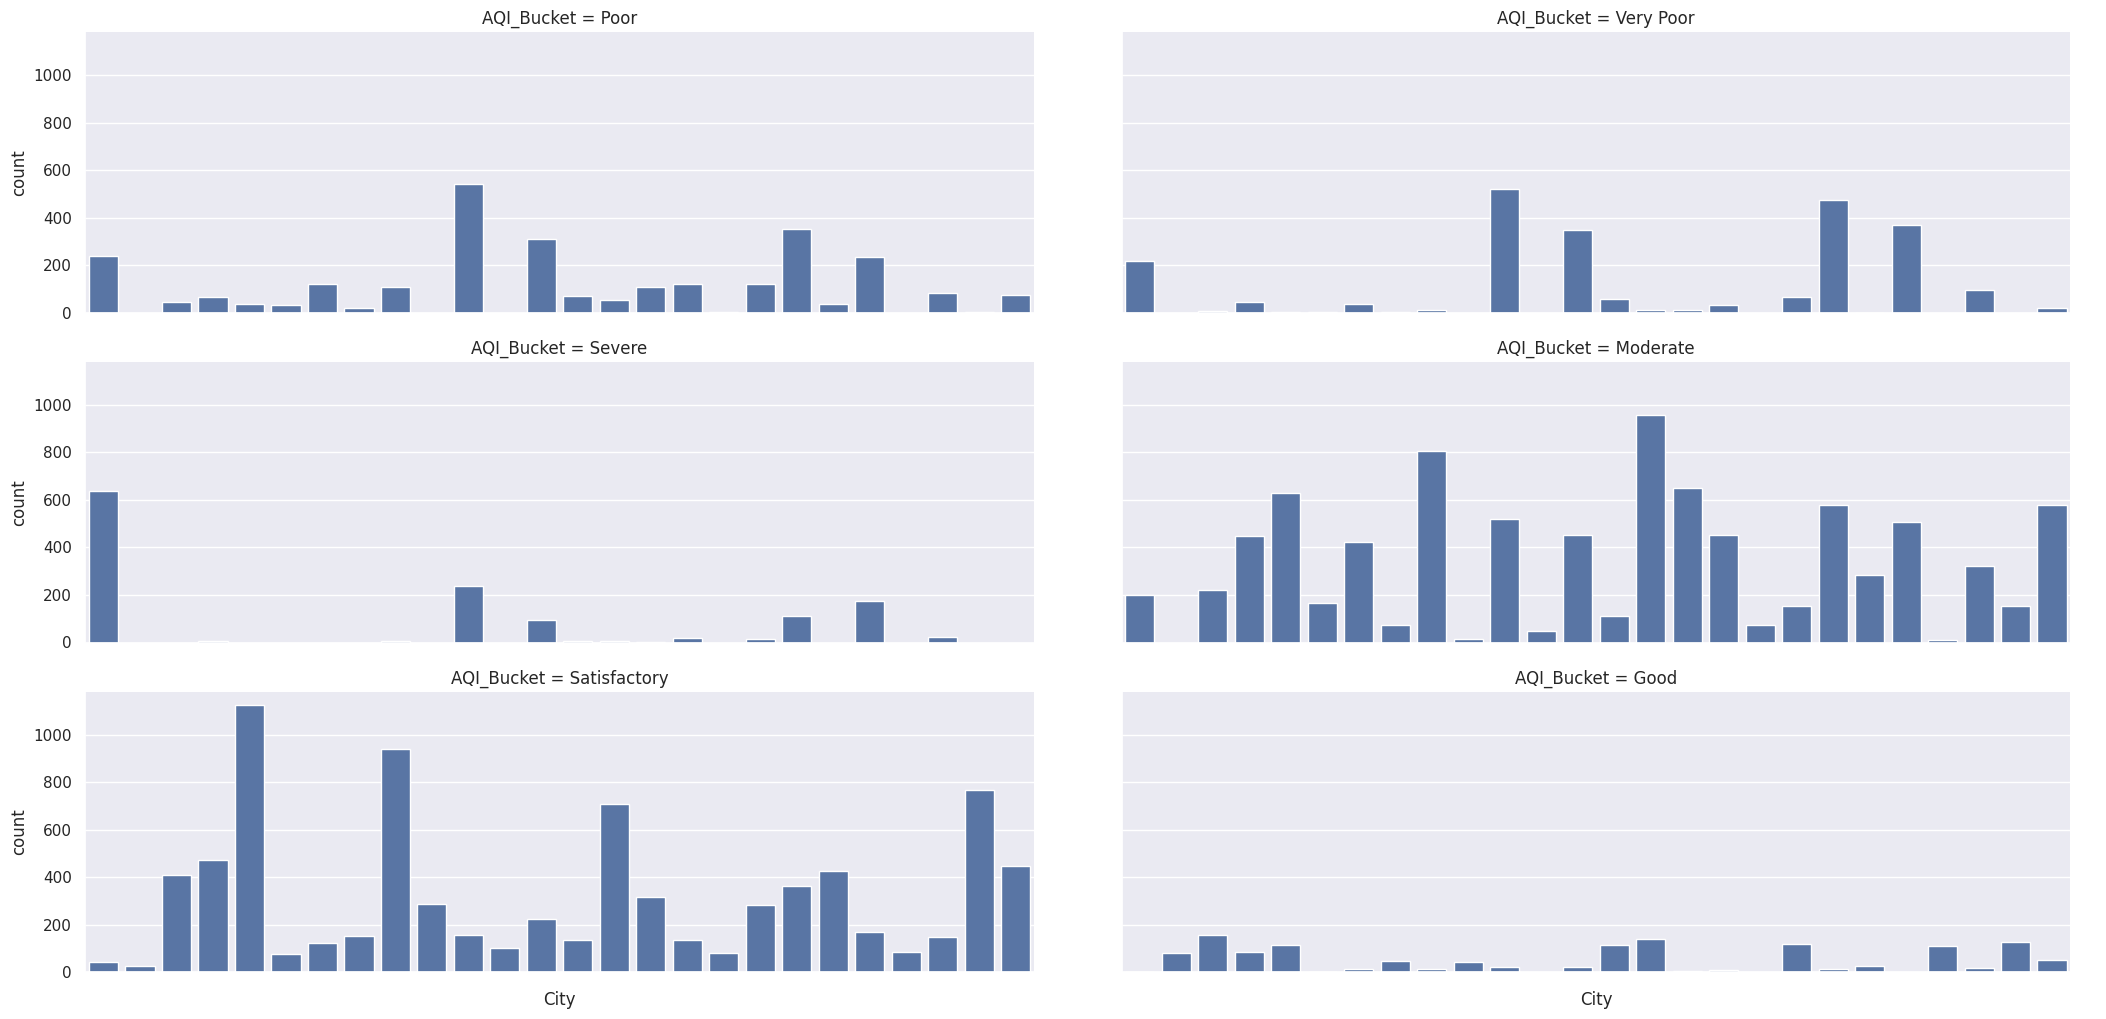

In [ ]:
# Bivariate
sns.set_theme(style='darkgrid')
# Check if 'city' column exists, if not, replace with correct column name
if 'city' not in df.columns:
    # Assuming the column name is 'City' instead of 'city'
    graph = sns.catplot(x="City", kind='count', data=df, col='AQI_Bucket',
                    col_wrap=2, height=3.5, aspect=3)  # Changed col_warp to col_wrap
else:
    graph = sns.catplot(x="City", kind='count', data=df, col='AQI_Bucket',
                    col_wrap=2, height=3.5, aspect=3)  # Changed col_warp to col_wrap

graph.set_xticklabels(rotation=90)

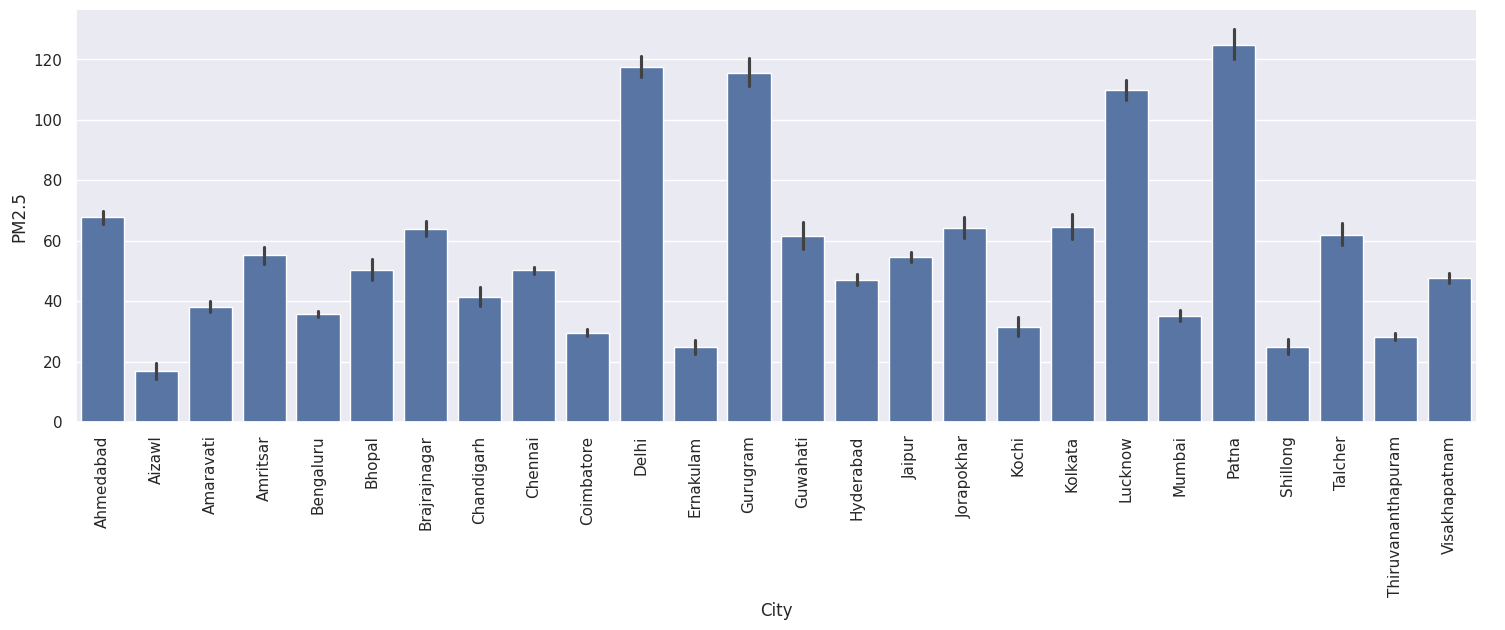

In [ ]:
graph1 = sns.catplot(x="City", y='PM2.5', kind='bar', data=df, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

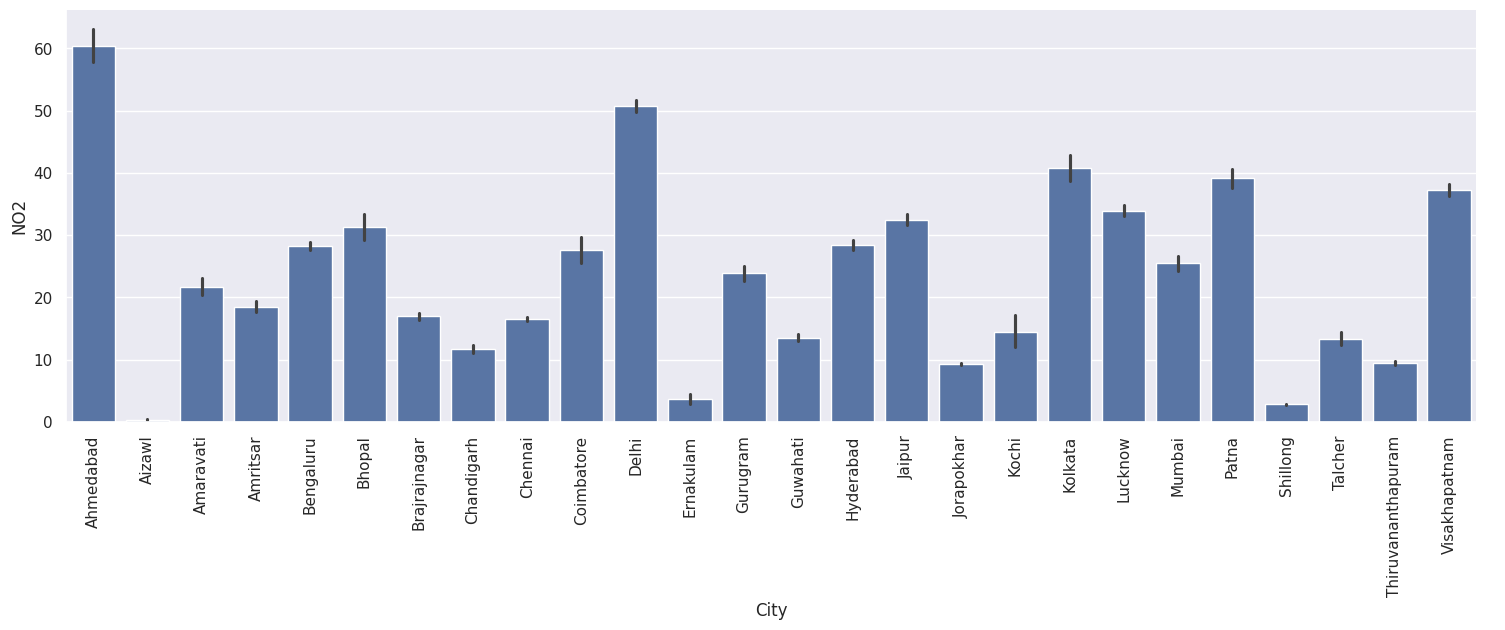

In [ ]:
graph2 = sns.catplot(x="City", y='NO2', kind='bar', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

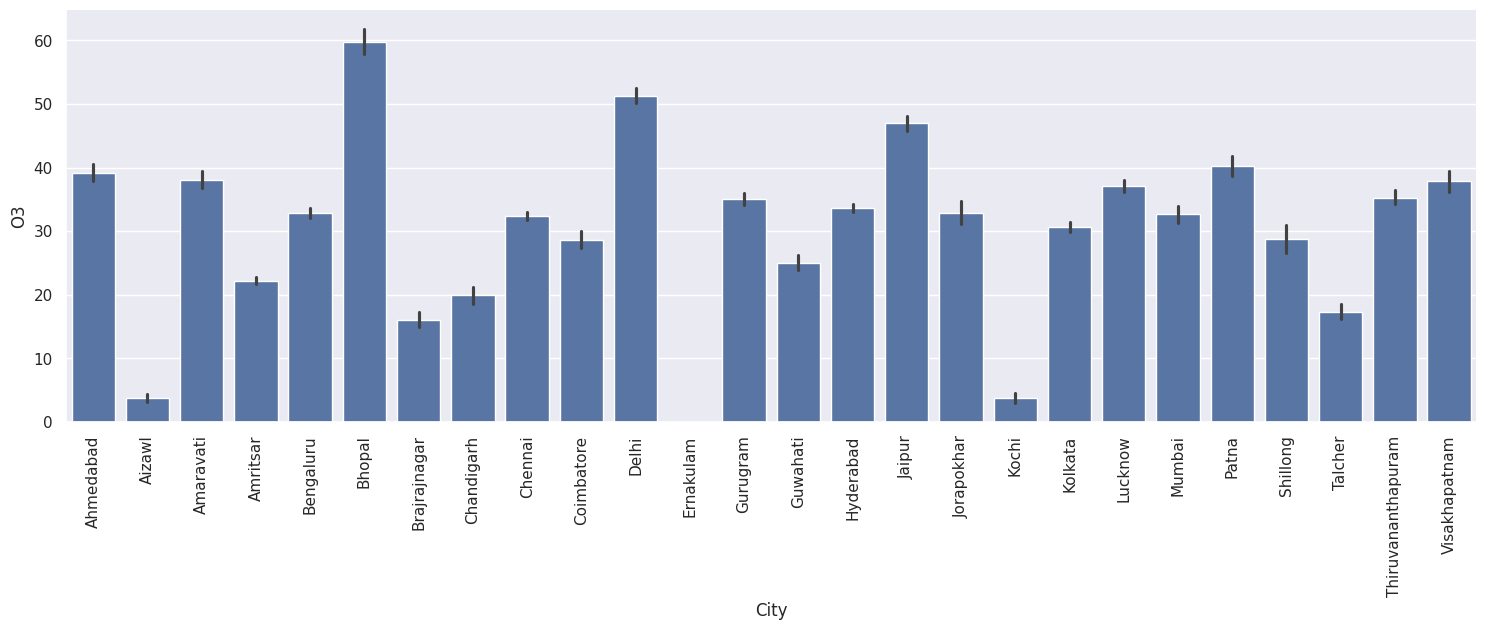

In [ ]:
graph3 = sns.catplot(x="City", y='O3', kind='bar', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

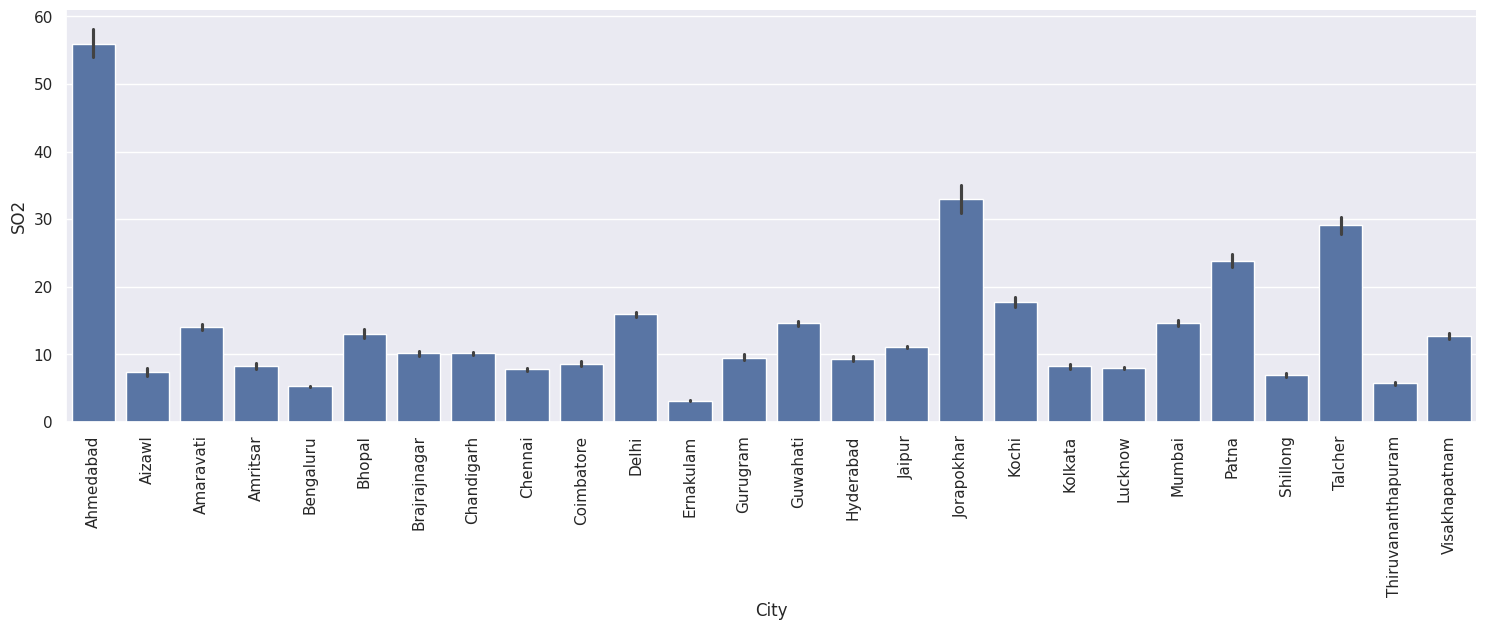

In [ ]:
graph4 = sns.catplot(x="City", y='SO2', kind='bar', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

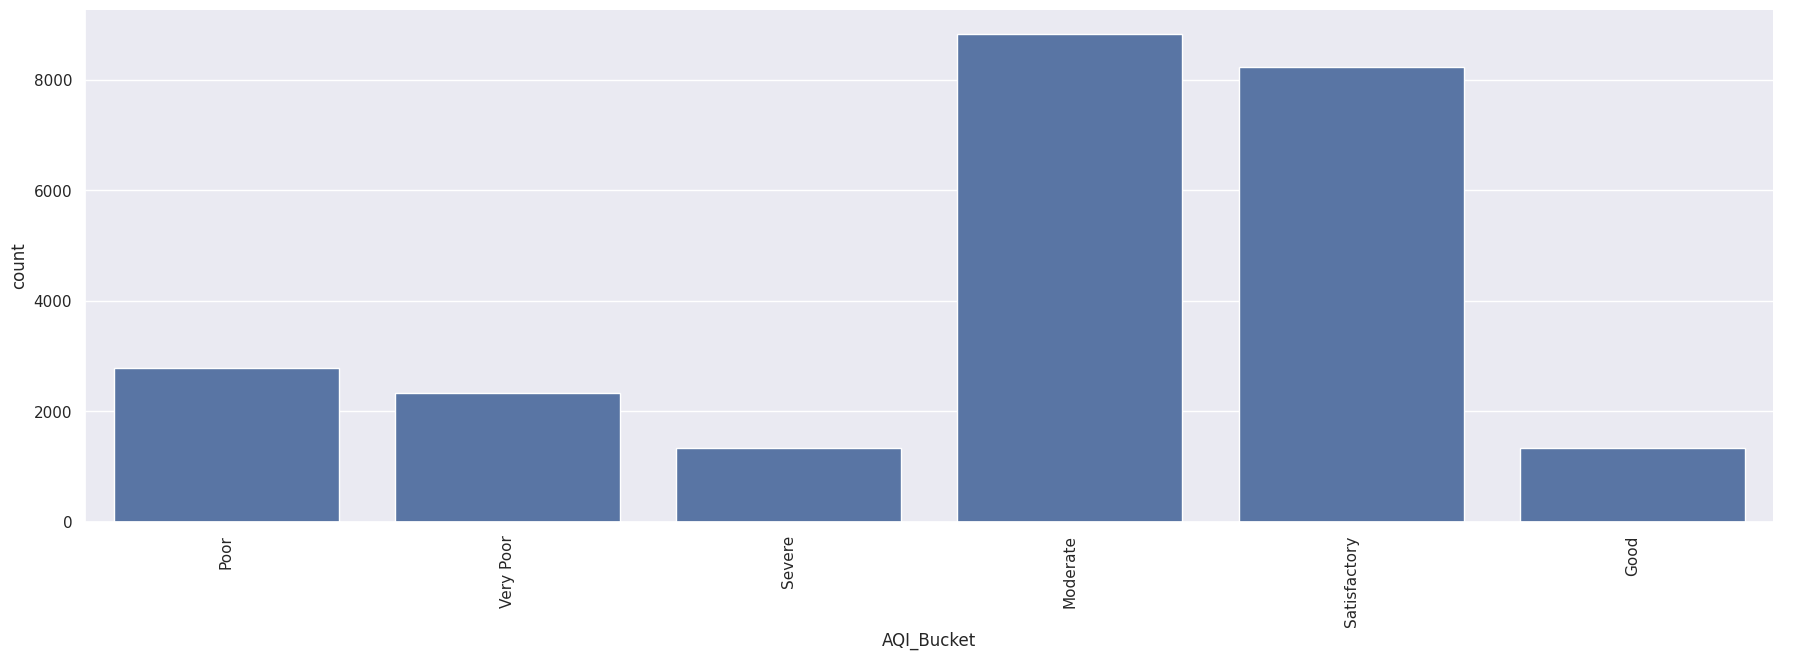

In [ ]:
graph5 = sns.catplot(x='AQI_Bucket',data=df,kind='count',height=6,aspect=3) # Changed 'AQI_bUcket' to 'AQI_Bucket'
graph5.set_xticklabels(rotation=90)

In [ ]:
#to check the null values
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,18109
PM10,11140
NH3,10328
Toluene,8041
Benzene,5623
AQI,4681
AQI_Bucket,4681
PM2.5,4598
NOx,4185
O3,4022


In [ ]:
df.describe().loc['mean']

,mean
PM2.5,67.450578
PM10,118.127103
NO,17.574730
NO2,28.560659
NOx,32.309123
NH3,23.483476
CO,2.248598
SO2,14.531977
O3,34.491430
Benzene,3.280840


In [ ]:
df = df.replace({
    "PM2.5": {np.nan: 67.450575},
    "PM10": {np.nan: 118.127103},
    "NO": {np.nan: 17.574730},
    "NO2": {np.nan: 28.560659},
    "NOx": {np.nan: 32.309123},
    "NH3": {np.nan: 23.483476},
    "CO": {np.nan: 2.248598},
    "SO2": {np.nan: 14.531977},
    "O3": {np.nan: 34.491430},
    "Benzene": {np.nan: 3.280840},
    "Toluene": {np.nan: 8.700972},
    "Xylene": {np.nan: 3.070128}
})


In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
df.drop(['AQI_Bucket'], axis=1, inplace=True) # Changed 'AOI_bucket' to 'AQI_Bucket' and add inplace=True

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.450575,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,2015-01-02,67.450575,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,2015-01-03,67.450575,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,2015-01-04,67.450575,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,2015-01-05,67.450575,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,NaN


<Axes: >

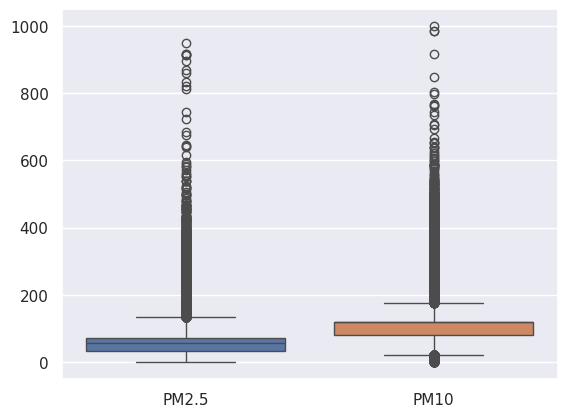

In [ ]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

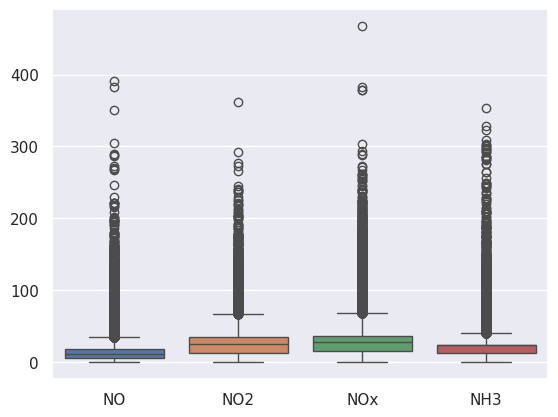

In [ ]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3']])

<Axes: >

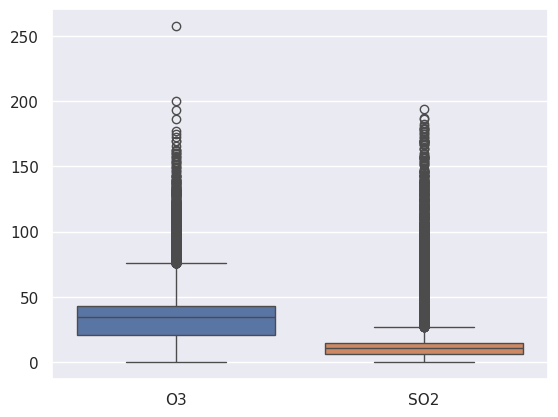

In [ ]:
sns.boxplot(data=df[['O3','SO2']])

In [ ]:
#IQR method -Q3 Q1
def replace_outliers(df):
  for column in df.select_dtypes(include='number'):
   Q1 = df[column].quantile(0.25)
   Q3 = df[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   df[column] = df[column].apply(
       lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
   )
   return df

In [ ]:
df=replace_outliers(df)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,54.524525,26.612577,0.04,32.150,58.030000,72.450000,132.89
PM10,29531.0,118.127103,71.500953,0.01,79.315,118.127103,118.127103,1000.00
NO,29531.0,17.574730,21.359220,0.02,6.210,11.530000,17.574730,390.68
NO2,29531.0,28.560659,22.941051,0.01,12.980,25.240000,34.665000,362.21
NOx,29531.0,32.309123,29.317936,0.00,14.670,27.550000,36.015000,467.63
NH3,29531.0,23.483476,20.711370,0.01,12.040,23.483476,23.483476,352.89
CO,29531.0,2.248598,6.715753,0.00,0.540,0.950000,1.710000,175.81
SO2,29531.0,14.531977,16.909088,0.01,6.090,10.480000,14.531977,193.86
O3,29531.0,34.491430,20.163443,0.01,20.740,34.491430,42.730000,257.73
Benzene,29531.0,3.280840,14.226364,0.00,0.240,1.840000,3.280840,455.03


<Axes: >

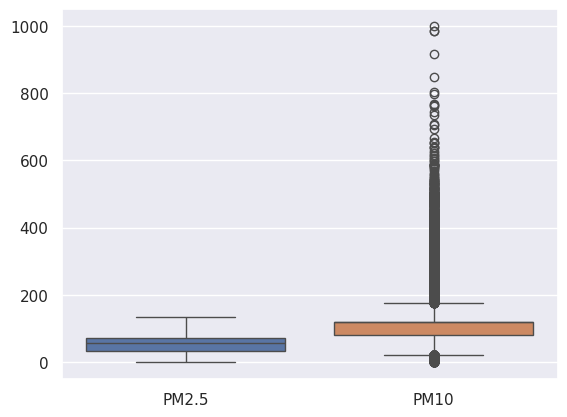

In [ ]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

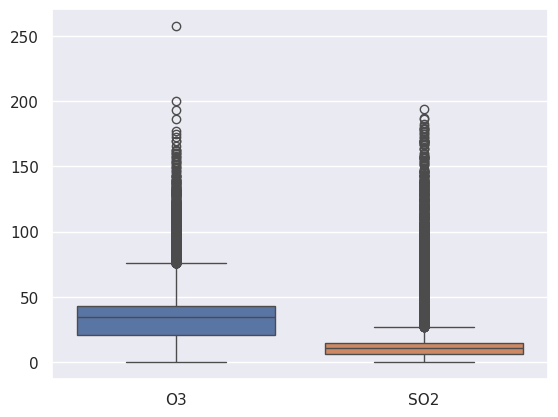

In [ ]:
sns.boxplot(data=df[['O3','SO2']])

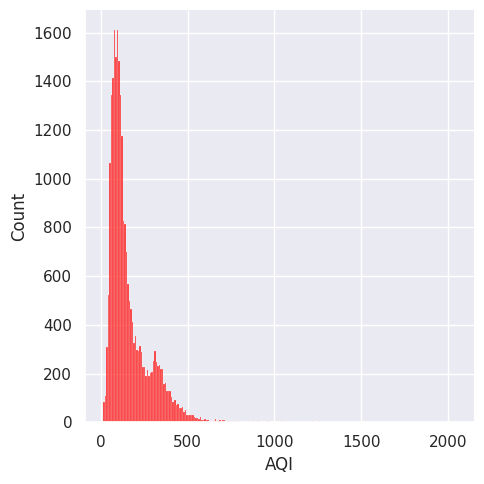

In [ ]:
sns.displot(df,x='AQI',color='red')
plt.show()

In [ ]:
df1 = df.drop(columns=['City'])

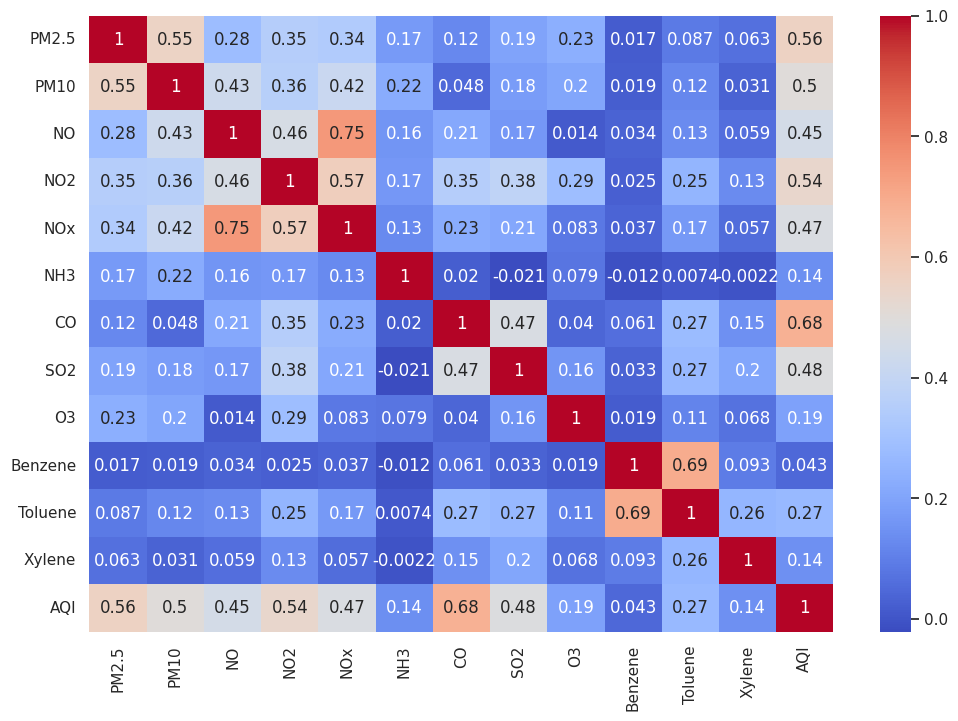

In [ ]:
# Multivariate Analysis - Heatmap
plt.figure(figsize=(12, 8))
# Exclude non-numeric columns before calculating correlation
numeric_df = df1.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

week 3-Data Modeling -10 March 2025


In [7]:
df.drop(['Date','City'],axis = 1,inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [9]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the dataframe to avoid modifying the original dataframe
df_scaled = df.copy()

# Remove or convert non-numeric columns. Assuming 'AQI_Bucket' is the problematic column
if 'AQI_Bucket' in df_scaled.columns:
    df_scaled = df_scaled.drop(columns=['AQI_Bucket'])

# Now apply StandardScaler
df1 = StandardScaler().fit_transform(df_scaled)
df1

array([[        nan,         nan, -0.73093842, ..., -0.43472898,
        -0.48555149,         nan],
       [        nan,         nan, -0.72874404, ..., -0.16029948,
         0.11068724,         nan],
       [        nan,         nan, -0.00766849, ...,  0.38555481,
        -0.12970609,         nan],
       ...,
       [-0.68884121, -0.57831758, -0.61990244, ..., -0.43522976,
        -0.48555149, -0.6998433 ],
       [-0.78580974, -0.75226393, -0.5935698 , ..., -0.43573054,
        -0.48555149, -0.79935021],
       [-0.81117312, -0.57533753, -0.75376005, ...,         nan,
                nan, -0.82778075]])

In [11]:
# After applying StandardScaler:
df1 = StandardScaler().fit_transform(df_scaled)

# Get the columns that were used for scaling
scaled_columns = df_scaled.columns

# Create the new DataFrame with the correct columns
df = pd.DataFrame(df1, columns=scaled_columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,NaN,NaN,-0.730938,-0.422511,-0.479031,NaN,-0.190815,0.722865,4.557310,-0.207506,-0.434729,-0.485551,NaN
1,NaN,NaN,-0.728744,-0.525885,-0.500835,NaN,-0.183634,0.552462,-0.019887,0.025246,-0.160299,0.110687,NaN
2,NaN,NaN,-0.007668,-0.378383,-0.082449,NaN,2.176063,0.801725,-0.174765,0.222579,0.385555,-0.129706,NaN
3,NaN,NaN,-0.696706,-0.411888,-0.453119,NaN,-0.078790,0.223787,0.073225,0.072682,0.072064,-0.327398,NaN
4,NaN,NaN,0.198604,-0.291762,0.172249,NaN,2.851083,1.367531,0.222110,0.235861,0.510250,-0.045885,NaN


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [14]:
# Feature & Target Selection
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
        'Benzene', 'Toluene', 'Xylene']]
y = df[['AQI']]


In [15]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,NaN,NaN,-0.730938,-0.422511,-0.479031,NaN,-0.190815,0.722865,4.557310,-0.207506,-0.434729,-0.485551
1,NaN,NaN,-0.728744,-0.525885,-0.500835,NaN,-0.183634,0.552462,-0.019887,0.025246,-0.160299,0.110687
2,NaN,NaN,-0.007668,-0.378383,-0.082449,NaN,2.176063,0.801725,-0.174765,0.222579,0.385555,-0.129706
3,NaN,NaN,-0.696706,-0.411888,-0.453119,NaN,-0.078790,0.223787,0.073225,0.072682,0.072064,-0.327398
4,NaN,NaN,0.198604,-0.291762,0.172249,NaN,2.851083,1.367531,0.222110,0.235861,0.510250,-0.045885


In [16]:
# Split the data into training and testing data - Training set = 80% | Testing set = 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X Train:', X_train.shape)
print('Shape of X Test:', X_test.shape)
print('Shape of y Train:', y_train.shape)
print('Shape of y Test:', y_test.shape)


Shape of X Train: (23624, 12)
Shape of X Test: (5907, 12)
Shape of y Train: (23624, 1)
Shape of y Test: (5907, 1)


In [18]:
#IQR method -Q3 Q1
def replace_outliers(df):
  for column in df.select_dtypes(include='number'):
   Q1 = df[column].quantile(0.25)
   Q3 = df[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   df[column] = df[column].apply(
       lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
   )
  # The return statement was inside the loop, causing it to exit prematurely.
  # Move it outside the loop to return the modified DataFrame after processing all columns.
  return df

In [19]:
# After applying StandardScaler, check for and handle NaN values
df1 = StandardScaler().fit_transform(df_scaled)

# Check for NaN values after scaling
if np.isnan(df1).any():
    # Impute NaN values (e.g., with the mean) or remove rows with NaNs
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace with your desired strategy
    df1 = imputer.fit_transform(df1)

# Create the new DataFrame with the correct columns
df = pd.DataFrame(df1, columns=scaled_columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,9.119387e-18,1.483597e-16,-0.730938,-0.422511,-0.479031,1.065648e-16,-0.190815,0.722865,4.557310,-0.207506,-0.434729,-0.485551,-9.149846e-17
1,9.119387e-18,1.483597e-16,-0.728744,-0.525885,-0.500835,1.065648e-16,-0.183634,0.552462,-0.019887,0.025246,-0.160299,0.110687,-9.149846e-17
2,9.119387e-18,1.483597e-16,-0.007668,-0.378383,-0.082449,1.065648e-16,2.176063,0.801725,-0.174765,0.222579,0.385555,-0.129706,-9.149846e-17
3,9.119387e-18,1.483597e-16,-0.696706,-0.411888,-0.453119,1.065648e-16,-0.078790,0.223787,0.073225,0.072682,0.072064,-0.327398,-9.149846e-17
4,9.119387e-18,1.483597e-16,0.198604,-0.291762,0.172249,1.065648e-16,2.851083,1.367531,0.222110,0.235861,0.510250,-0.045885,-9.149846e-17


In [21]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Ensure y_train matches X_train after dropping rows
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Replace NaNs with column mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [24]:
# After applying StandardScaler, check for and handle NaN values
df1 = StandardScaler().fit_transform(df_scaled)

# Check for NaN values after scaling
if np.isnan(df1).any():
    # Impute NaN values (e.g., with the mean) or remove rows with NaNs
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace with your desired strategy
    df1 = imputer.fit_transform(df1)

# Create the new DataFrame with the correct columns
df = pd.DataFrame(df1, columns=scaled_columns)
df.head()

# ... (rest of your code) ...

# Before fitting the model, impute or remove NaN values in y_train and y_test:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # or 'median', 'most_frequent'

y_train = imputer.fit_transform(y_train)
y_test = imputer.transform(y_test)

# Now fit the model:
LR = HistGradientBoostingRegressor()
LR.fit(X_train, y_train)


HistGradientBoostingRegressor()

In [26]:
# Linear Regression Model
LR = LinearRegression()
LR.fit(X_train, y_train)

# Predicting the values
train_pred = LR.predict(X_train)  # Predicting train
test_pred = LR.predict(X_test)    # Predicting test

# Evaluation for Linear Regression
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))

print("RMSE Train Data = ", str(RMSE_train))
print("RMSE Test Data = ", str(RMSE_test))
print("-" * 60)
print("R Squared value for Train = ", LR.score(X_train, y_train))
print("R Squared value on Test = ", LR.score(X_test, y_test))


RMSE Train Data =  0.1974977071999158
RMSE Test Data =  0.21368102253440766
------------------------------------------------------------
R Squared value for Train =  0.9068735579082433
R Squared value on Test =  0.8999972792922449


In [30]:
from sklearn.neighbors import KNeighborsRegressor # Import the KNeighborsRegressor class

Knn = KNeighborsRegressor() # Now you can use KNeighborsRegressor
Knn.fit(X_train, y_train)

KNeighborsRegressor()

In [33]:
# Decision Tree Regressor Model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Predicting the values
train_pred = dtr.predict(X_train)  # Predicting train
test_pred = dtr.predict(X_test)    # Predicting test

# Evaluation for Decision Tree Regressor
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))

print("RMSE Train Data = ", str(RMSE_train))
print("RMSE Test Data = ", str(RMSE_test))
print("-" * 60)
print("R Squared value for Train = ", dtr.score(X_train, y_train))
print("R Squared value on Test = ", dtr.score(X_test, y_test))



RMSE Train Data =  6.332253946123155e-18
RMSE Test Data =  0.23772800728822238
------------------------------------------------------------
R Squared value for Train =  1.0
R Squared value on Test =  0.8762228128251461


In [35]:
# Import the necessary library
from sklearn.ensemble import RandomForestRegressor

# Create and train the RandomForestRegressor model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Now you can use rfr for prediction
train_pred = rfr.predict(X_train)  # Predicting train
test_pred = rfr.predict(X_test)    # Predicting test

# ... (rest of your code)

In [36]:
# Predicting the values
train_pred = rfr.predict(X_train)  # Predicting train
test_pred = rfr.predict(X_test)    # Predicting test

# Evaluation for Random Forest Regressor
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))

print("RMSE Train Data = ", str(RMSE_train))
print("RMSE Test Data = ", str(RMSE_test))
print("-" * 60)
print("R Squared value for Train = ", rfr.score(X_train, y_train))
print("R Squared value on Test = ", rfr.score(X_test, y_test))


RMSE Train Data =  0.06192613706061168
RMSE Test Data =  0.16756714995032548
------------------------------------------------------------
R Squared value for Train =  0.9908441878431926
R Squared value on Test =  0.9385024696733931
